In [ ]:
!nvidia-smi

Tue Oct 10 16:05:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install -q roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="Bj41I7ugBZYoEl6z6Yj9")
project = rf.workspace("potatosegmentation").project("potato-instance-segmentation-4imrd")
dataset = project.version(2).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to potato-instance-segmentation-2 in yolov8:: 100%|██████████| 908/908 [00:00<00:00, 9179.06it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 247MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/potato-instance-segmentation-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1040.jpg
events.out.tfevents.1696954061.0f7c9c84d105.1456.0  train_batch1041.jpg
F1_curve.png					    train_batch1042.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


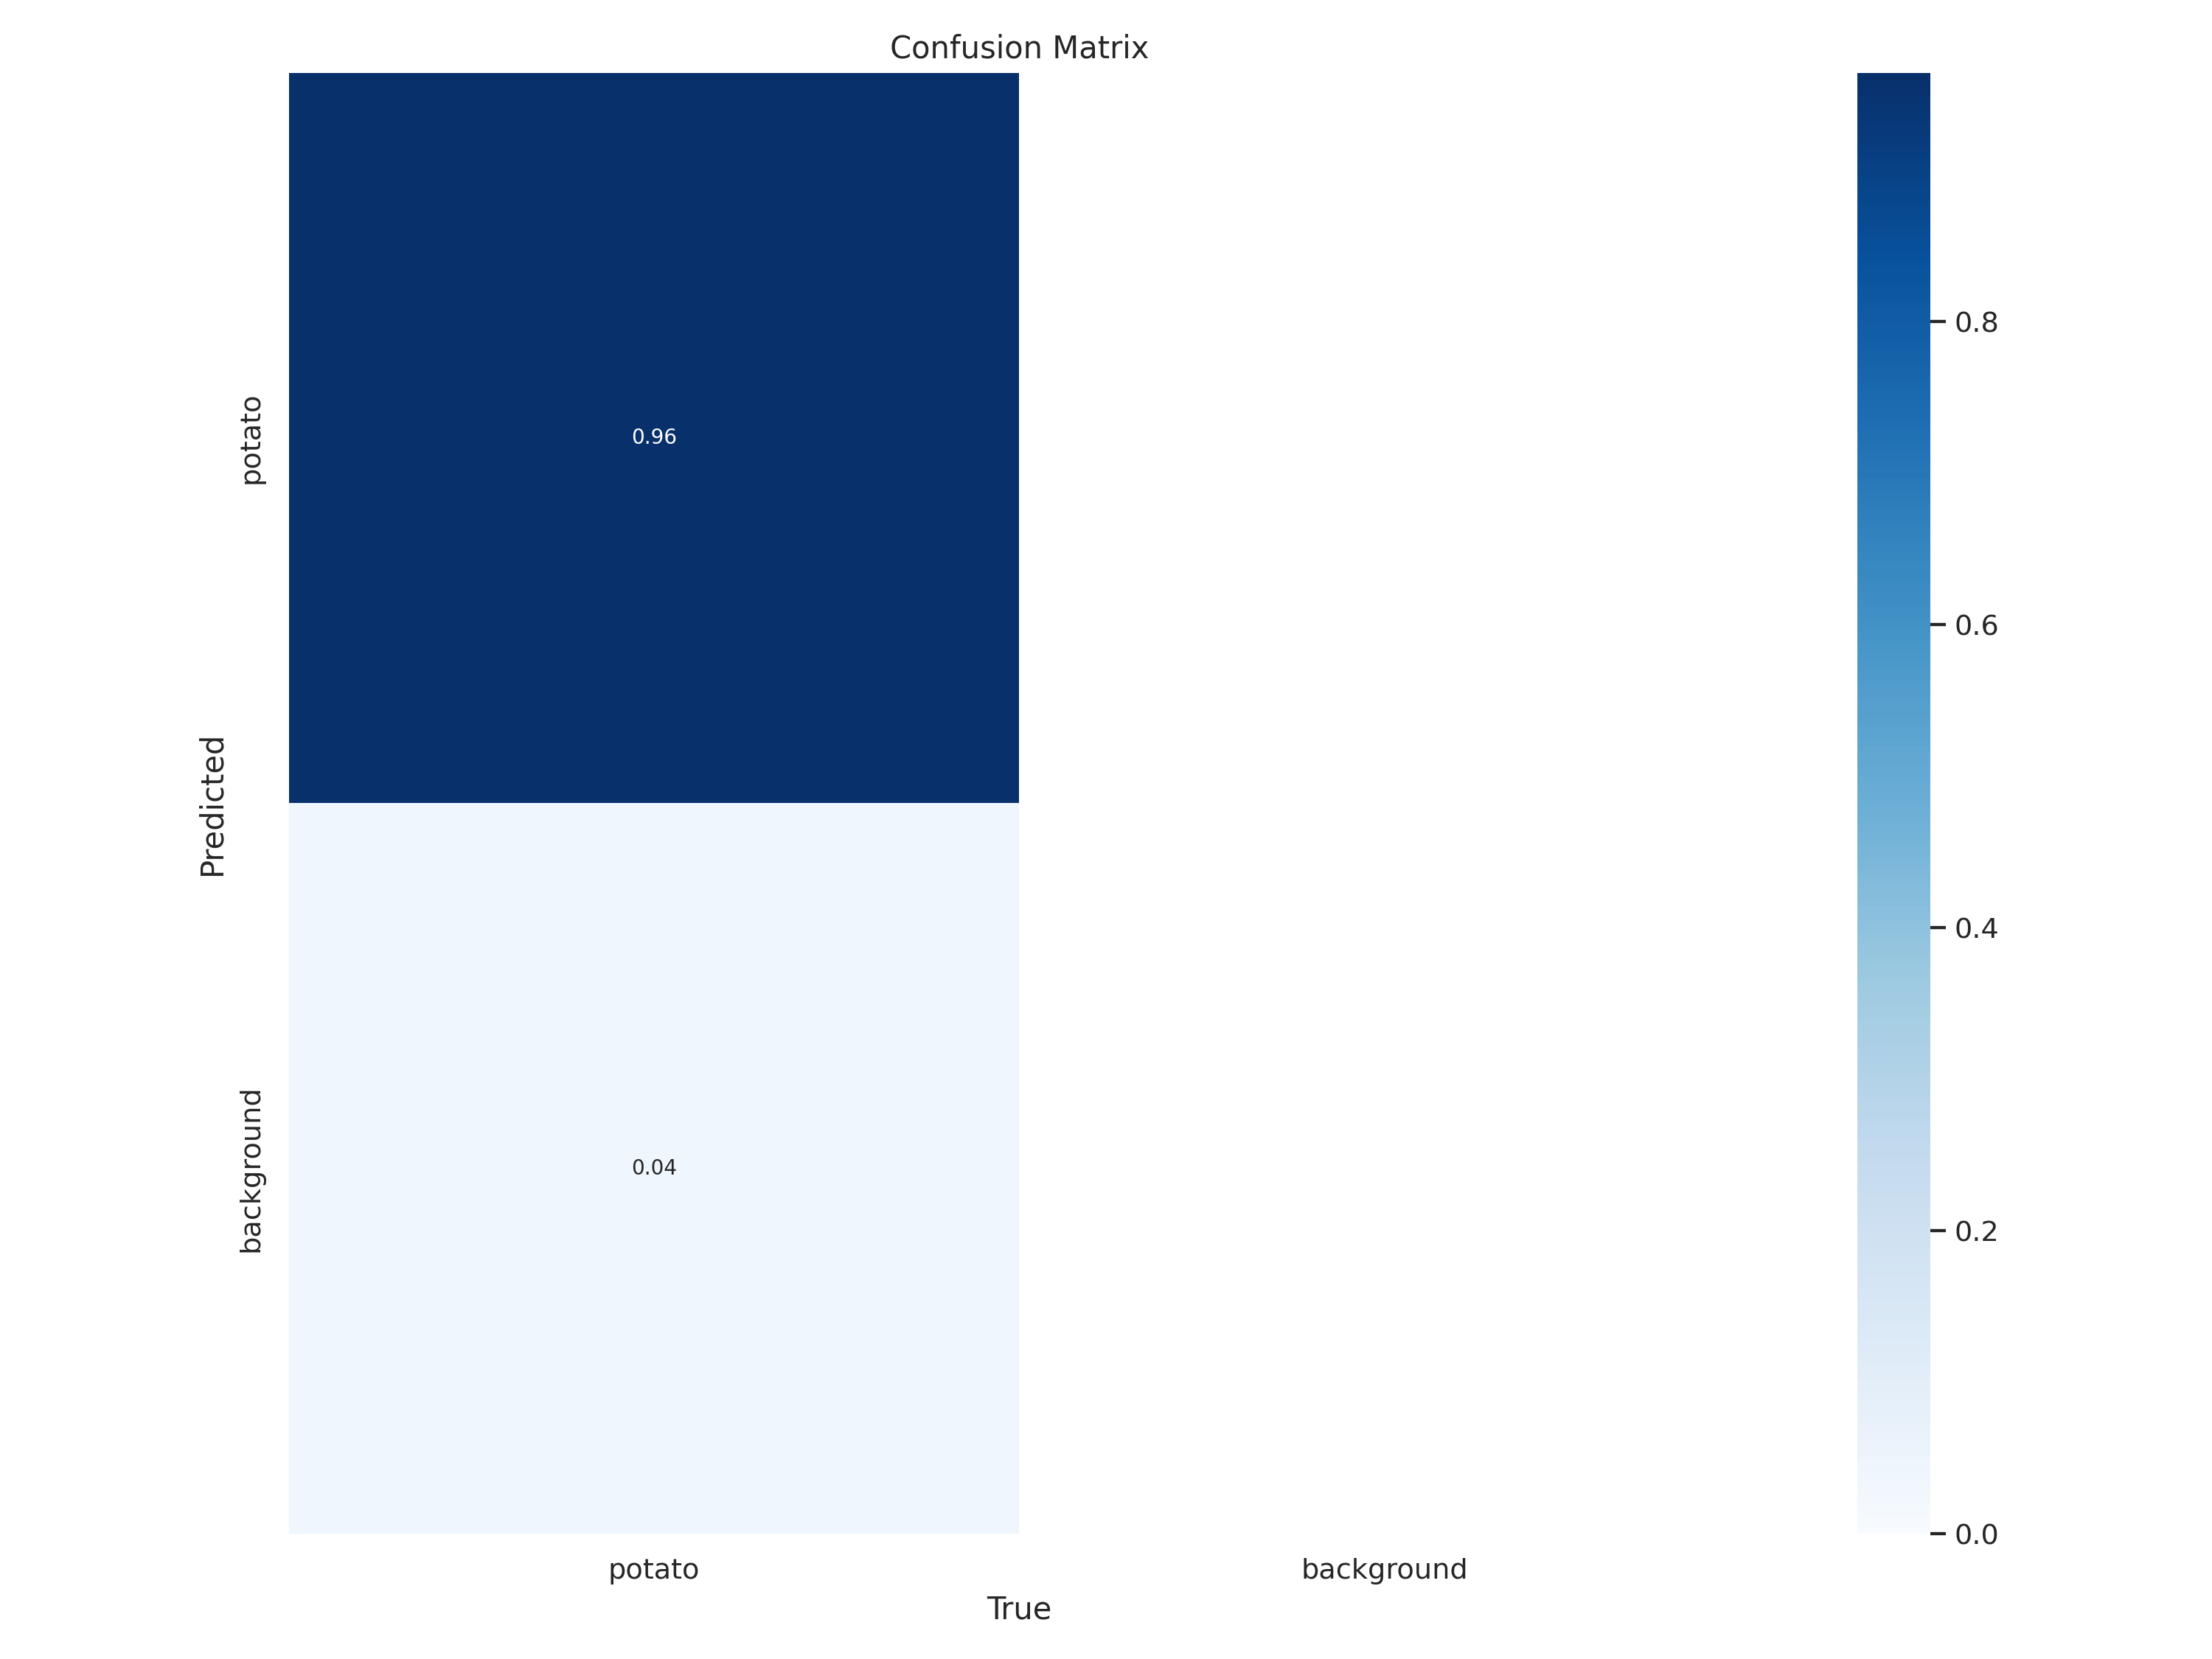

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


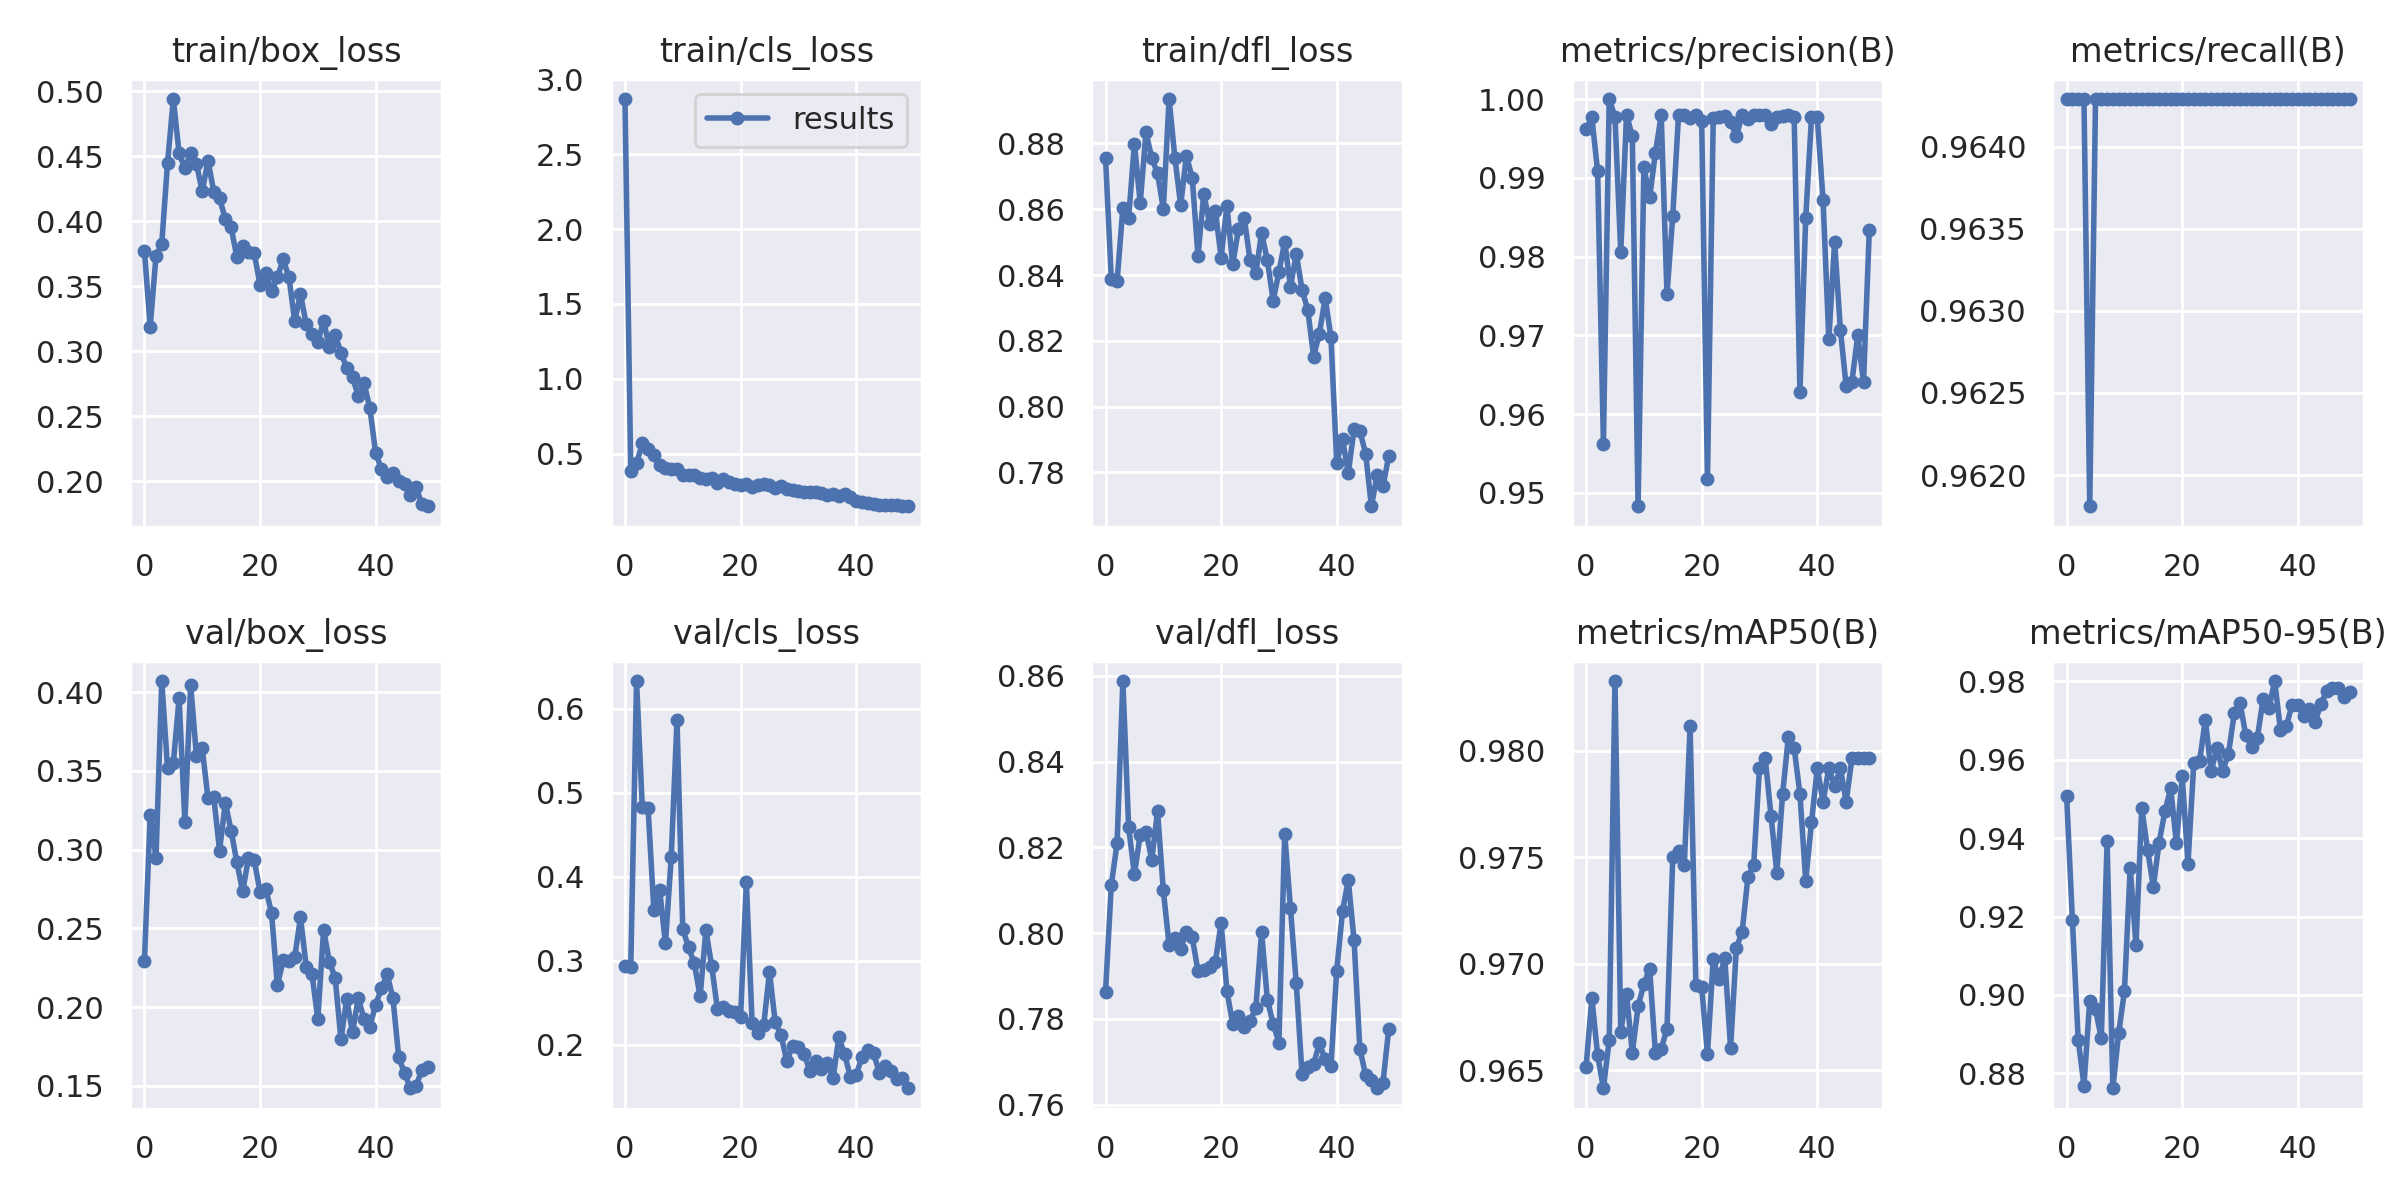

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

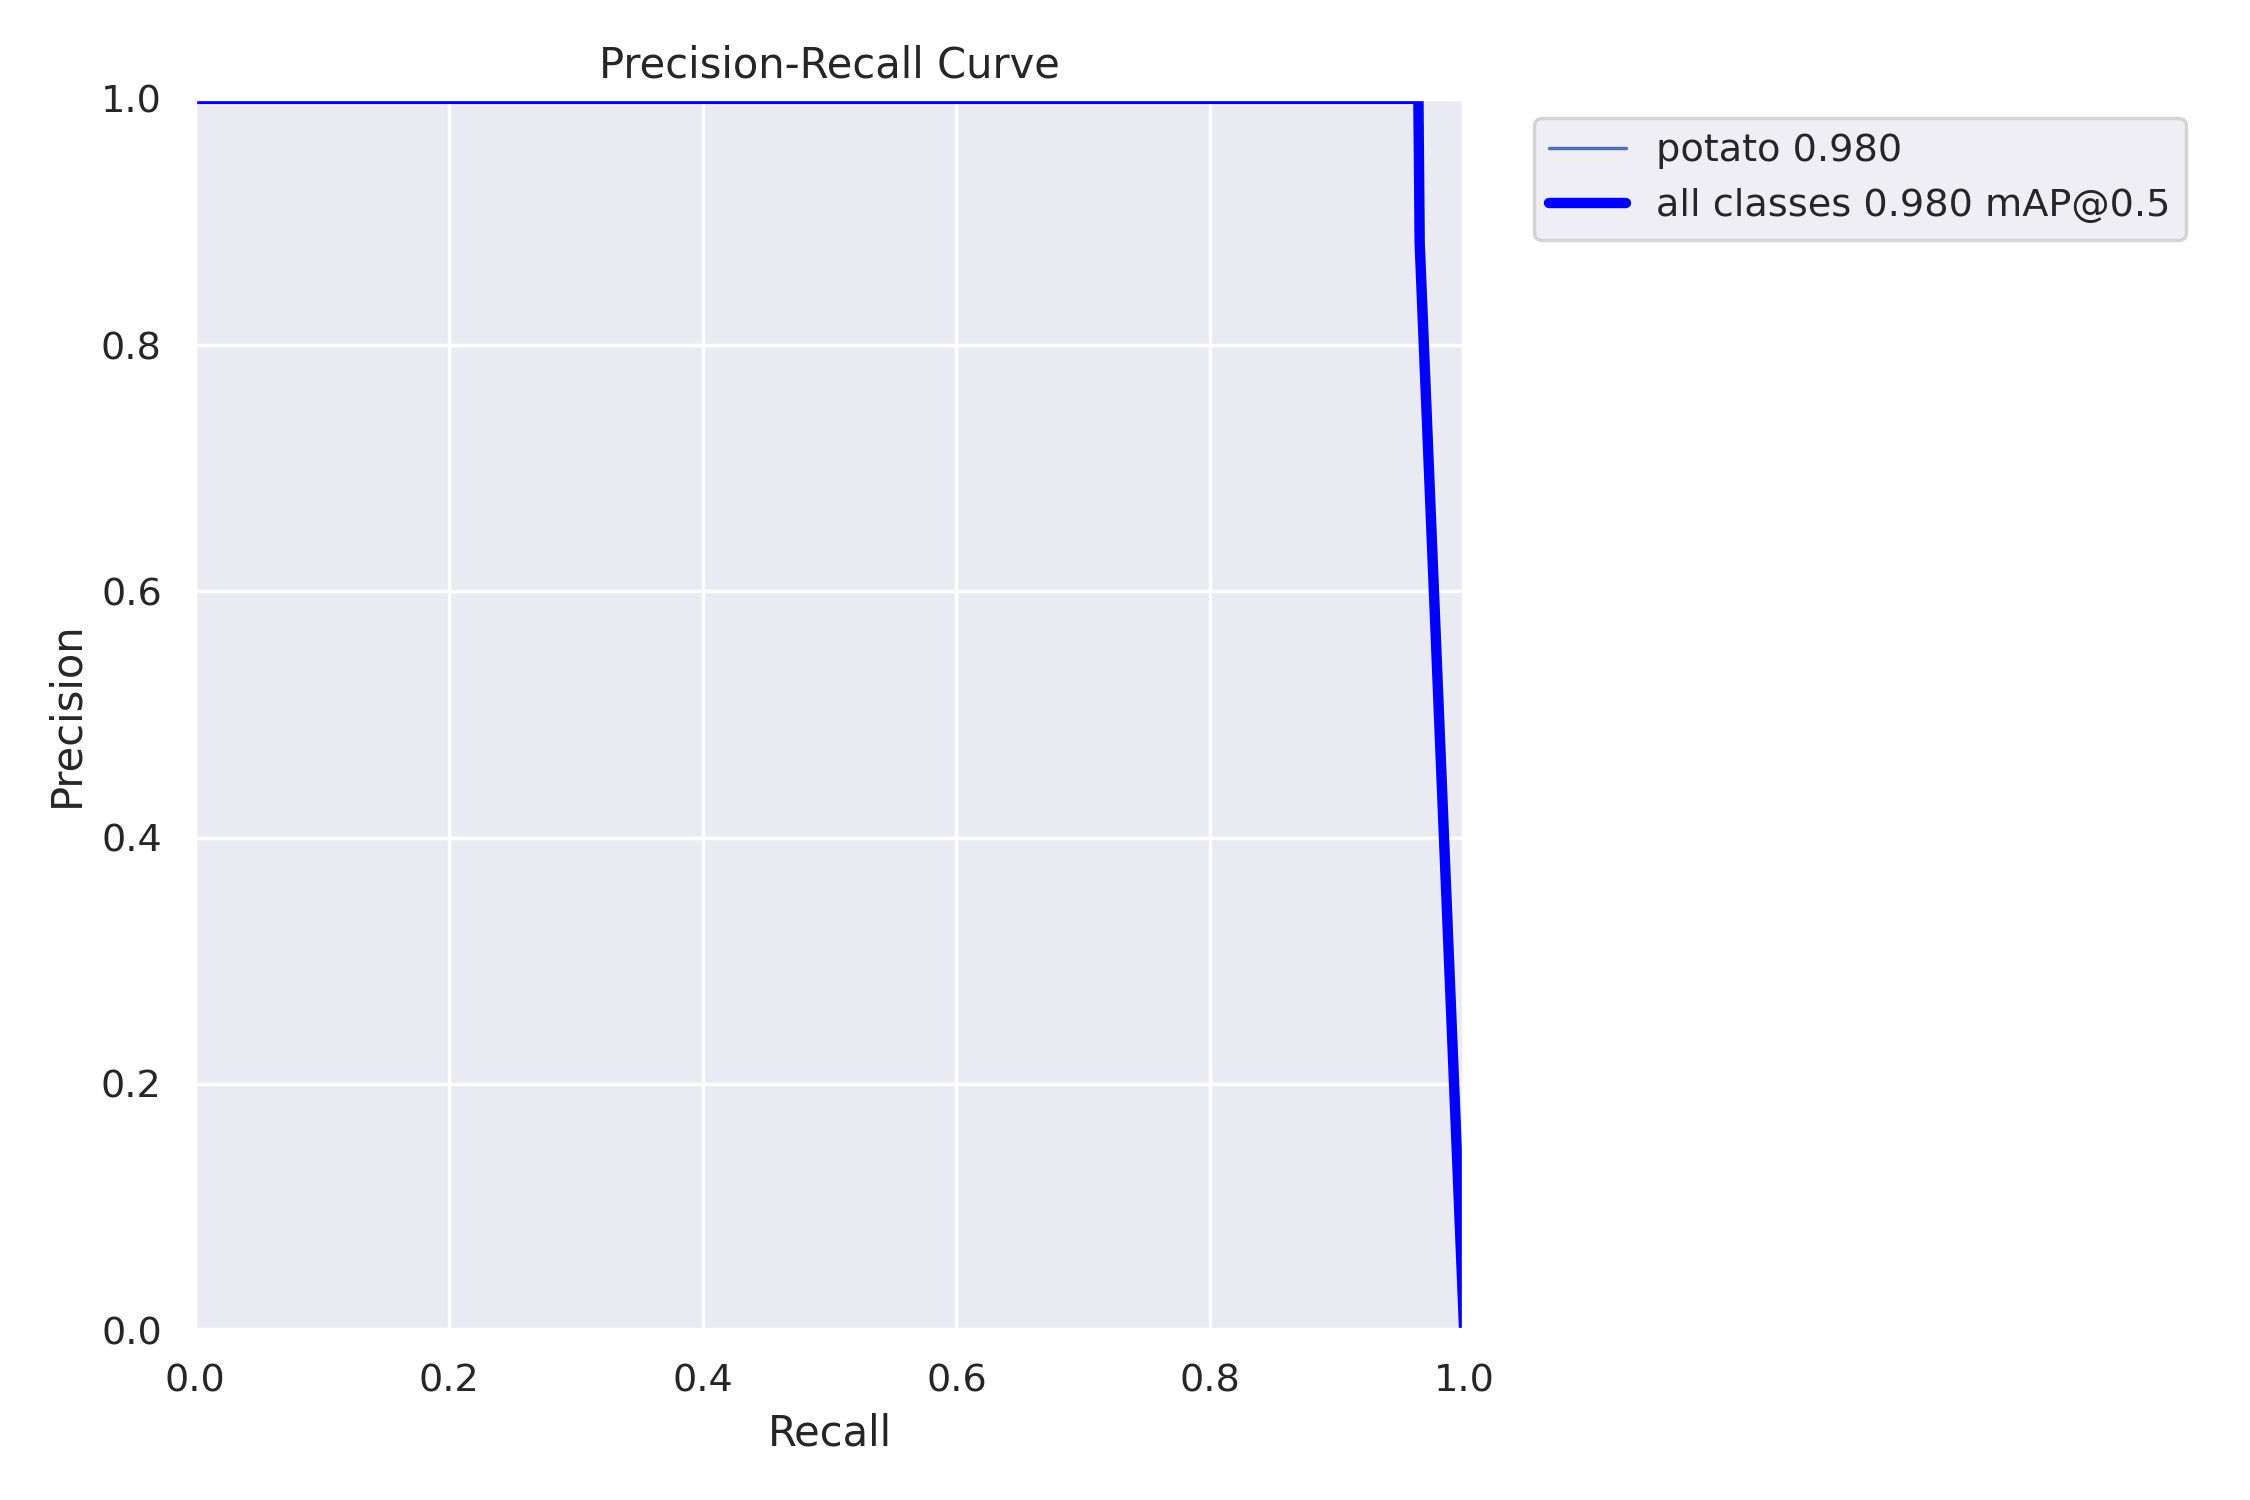

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=1000)

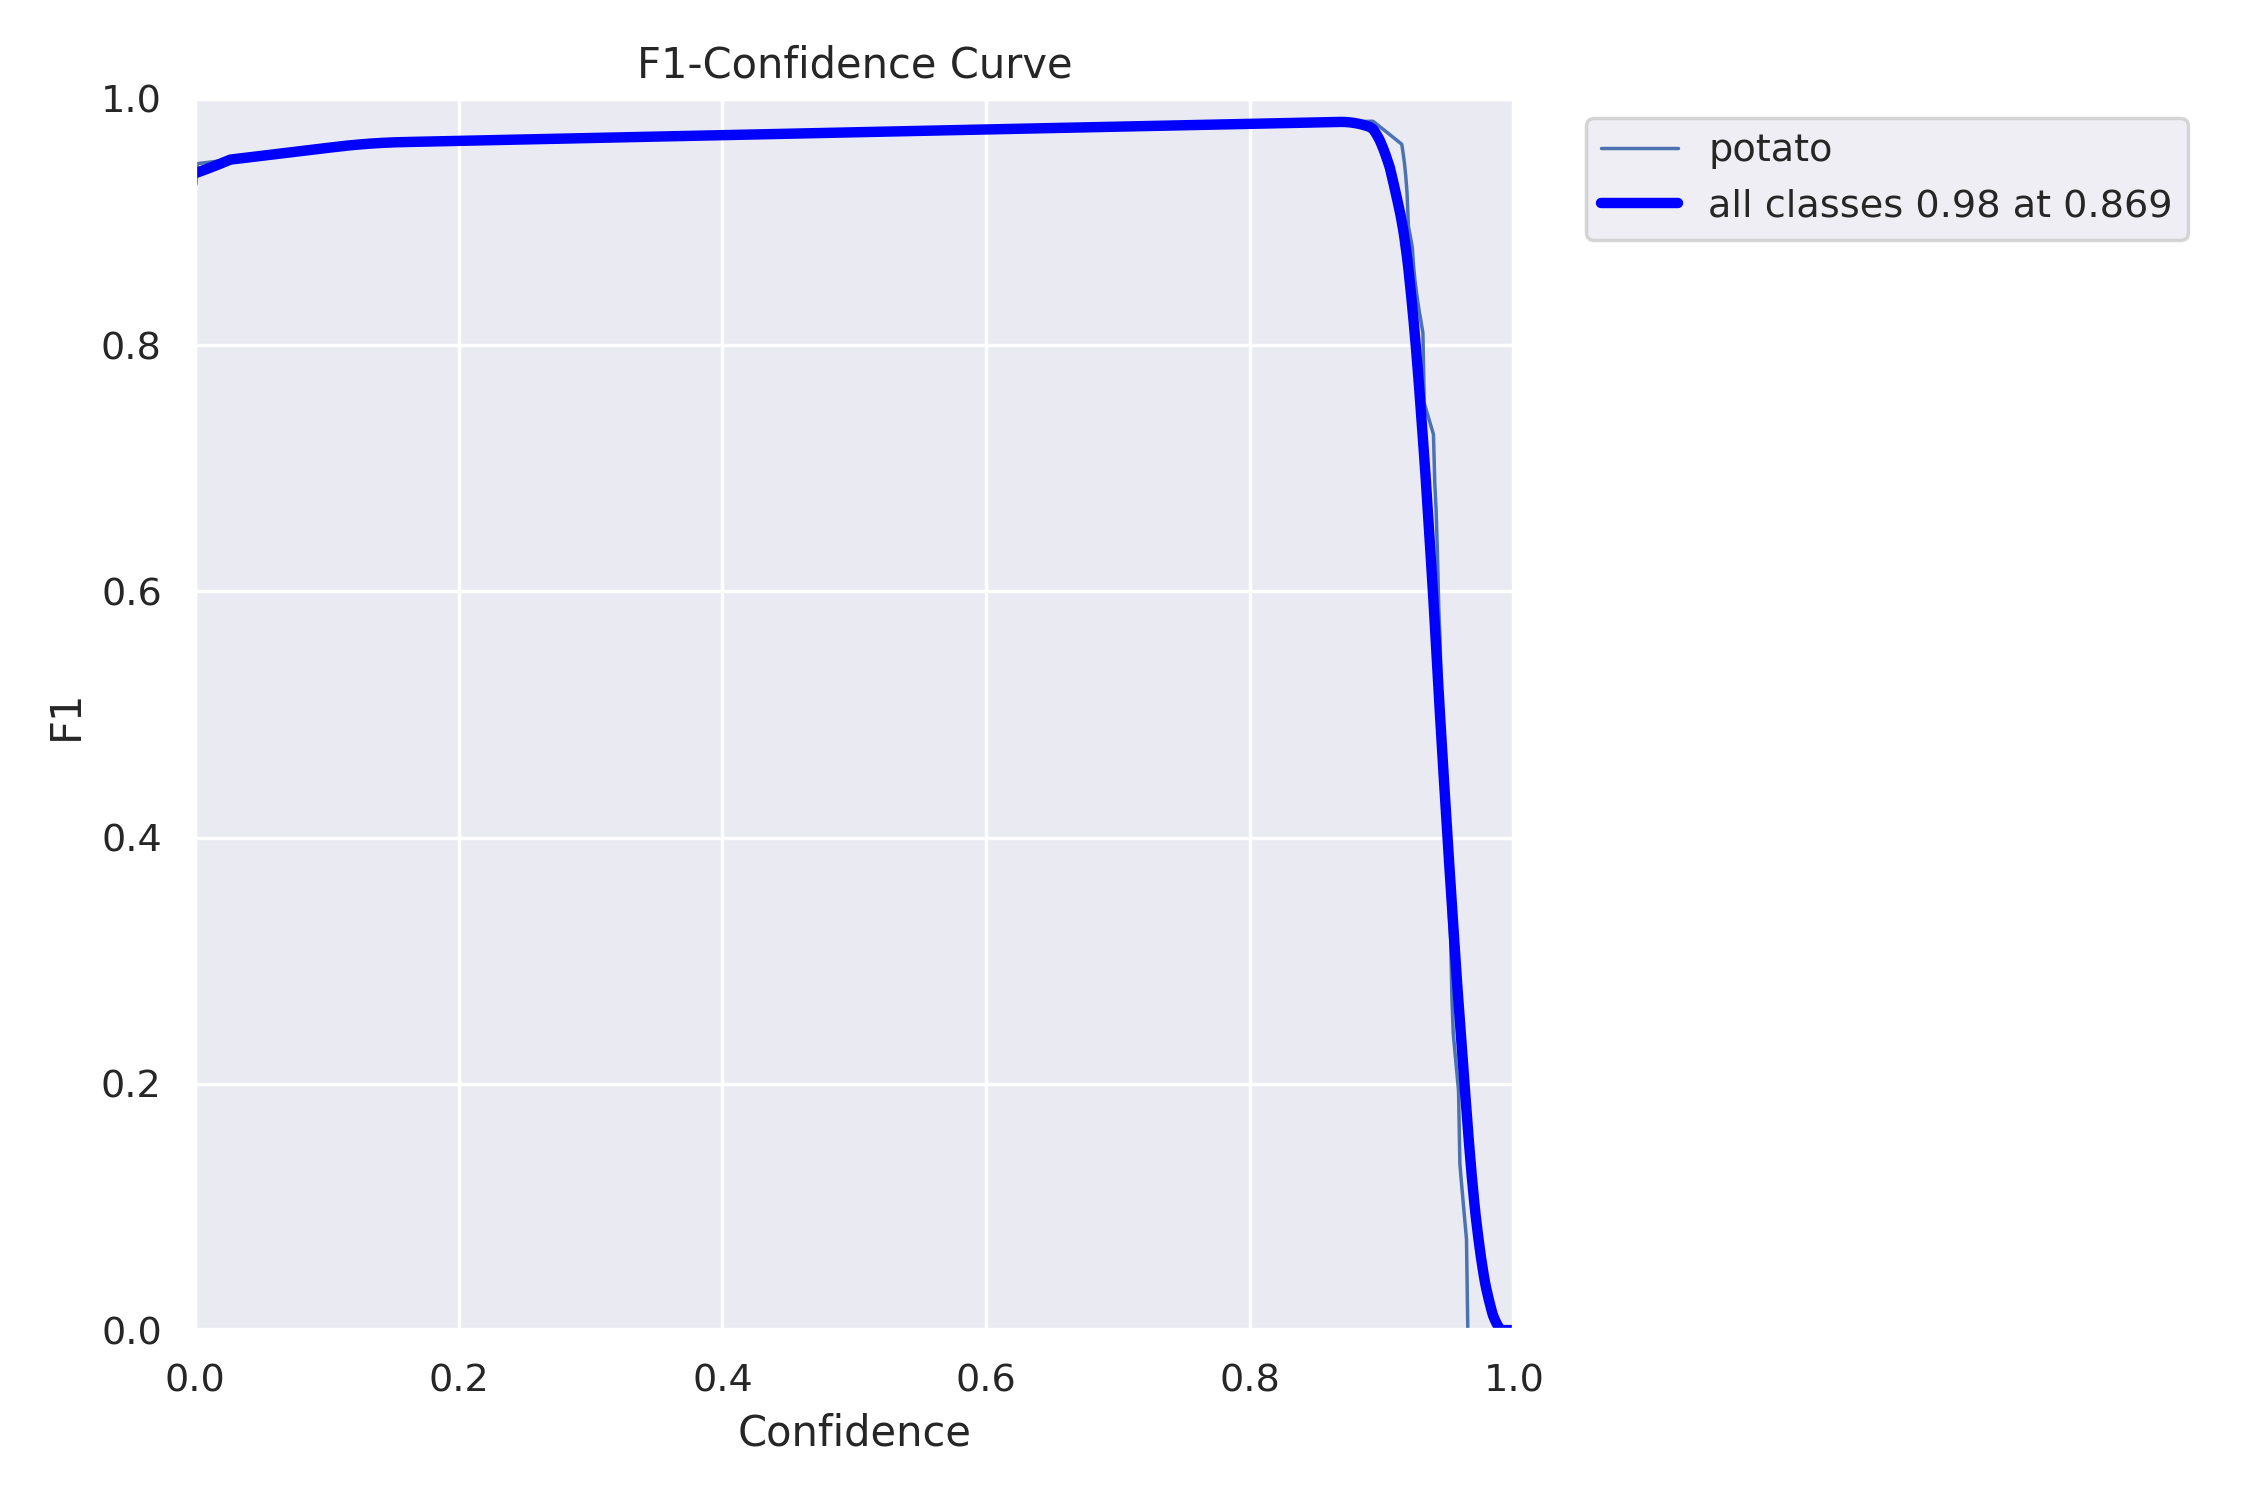

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=1000)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/runs/detect/train/results.csv", delimiter=',')
df.columns = df.columns.str.strip()
df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),...,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.37728,2.86810,0.87564,0.99618,...,0.29403,0.78636,0.077500,0.002500,0.002500
1,1,0.31899,0.38497,0.83876,0.99766,...,0.29231,0.81120,0.053999,0.004999,0.004999
2,2,0.37338,0.43503,0.83811,0.99081,...,0.63307,0.82091,0.030395,0.007395,0.007395
3,3,0.38288,0.56827,0.86043,0.95620,...,0.48254,0.85876,0.009406,0.009406,0.009406
4,4,0.44497,0.53412,0.85741,1.00000,...,0.48136,0.82468,0.009406,0.009406,0.009406


In [ ]:
df.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [ ]:
def f1_score(row):
  return ((row['metrics/precision(B)'] * row['metrics/recall(B)']) / (row['metrics/precision(B)'] + row['metrics/recall(B)']))
df['f1_score'] = df.apply(f1_score, axis=1)

In [ ]:
df.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),...,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,f1_score
0,0,0.37728,2.86810,0.87564,0.99618,...,0.78636,0.077500,0.002500,0.002500,0.489988
1,1,0.31899,0.38497,0.83876,0.99766,...,0.81120,0.053999,0.004999,0.004999,0.490346
2,2,0.37338,0.43503,0.83811,0.99081,...,0.82091,0.030395,0.007395,0.007395,0.488685
3,3,0.38288,0.56827,0.86043,0.95620,...,0.85876,0.009406,0.009406,0.009406,0.480114
4,4,0.44497,0.53412,0.85741,1.00000,...,0.82468,0.009406,0.009406,0.009406,0.490267


In [ ]:
df.to_excel("/content/results.xlsx")

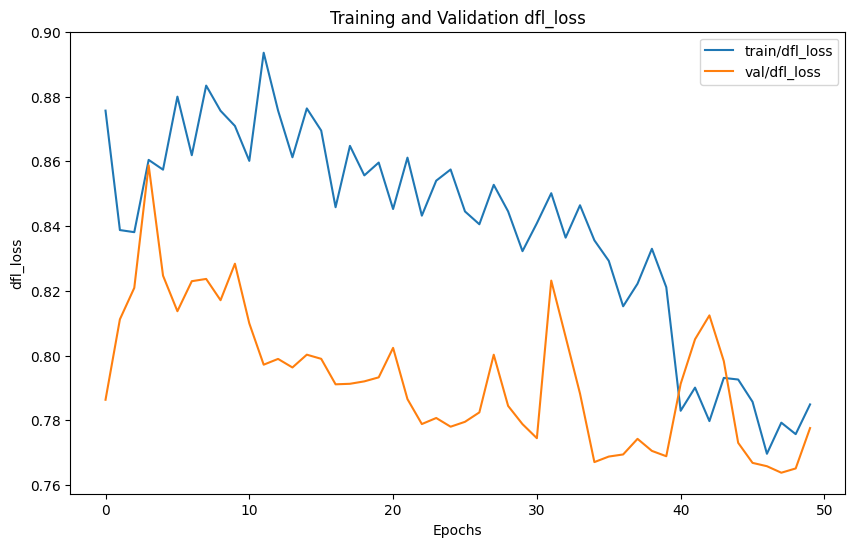

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['train/dfl_loss', 'val/dfl_loss']], dashes=False)

plt.xlabel('Epochs')
plt.ylabel('dfl_loss')
plt.title('Training and Validation dfl_loss')

plt.show()

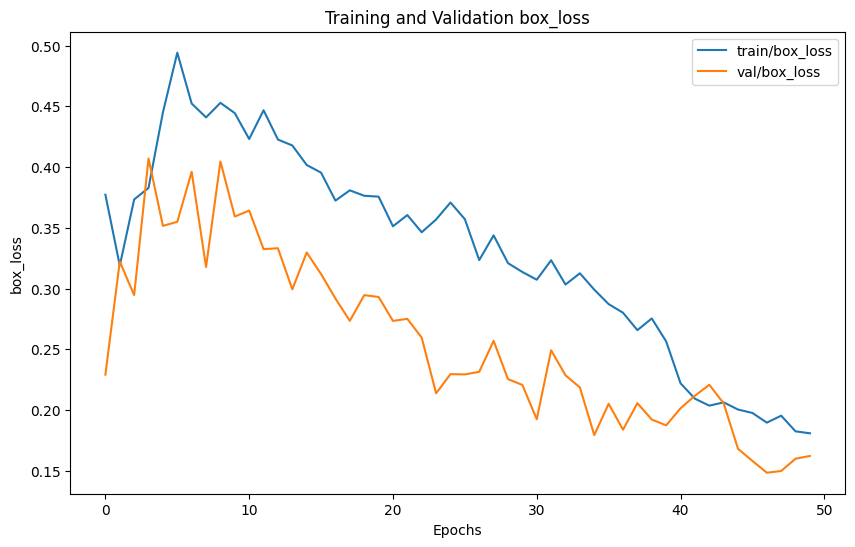

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['train/box_loss', 'val/box_loss']], dashes=False)

plt.xlabel('Epochs')
plt.ylabel('box_loss')
plt.title('Training and Validation box_loss')

plt.show()

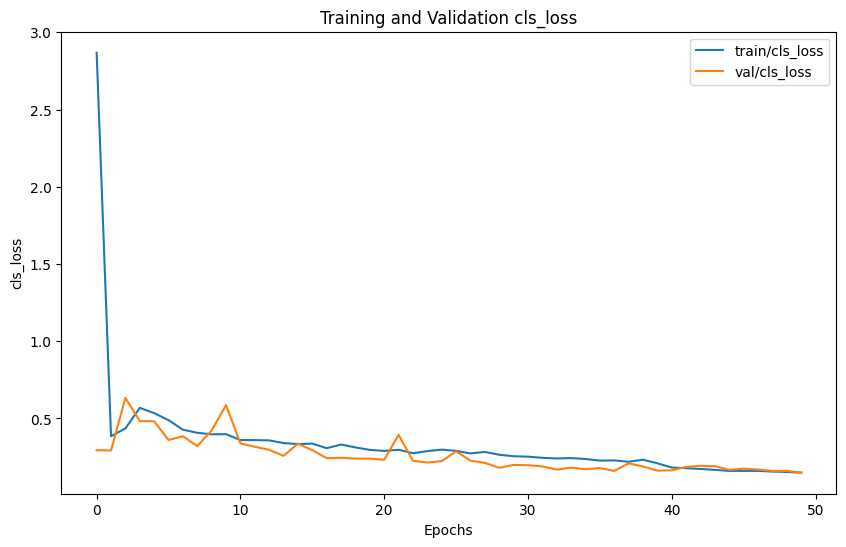

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['train/cls_loss', 'val/cls_loss']], dashes=False)

plt.xlabel('Epochs')
plt.ylabel('cls_loss')
plt.title('Training and Validation cls_loss')

plt.show()

/content


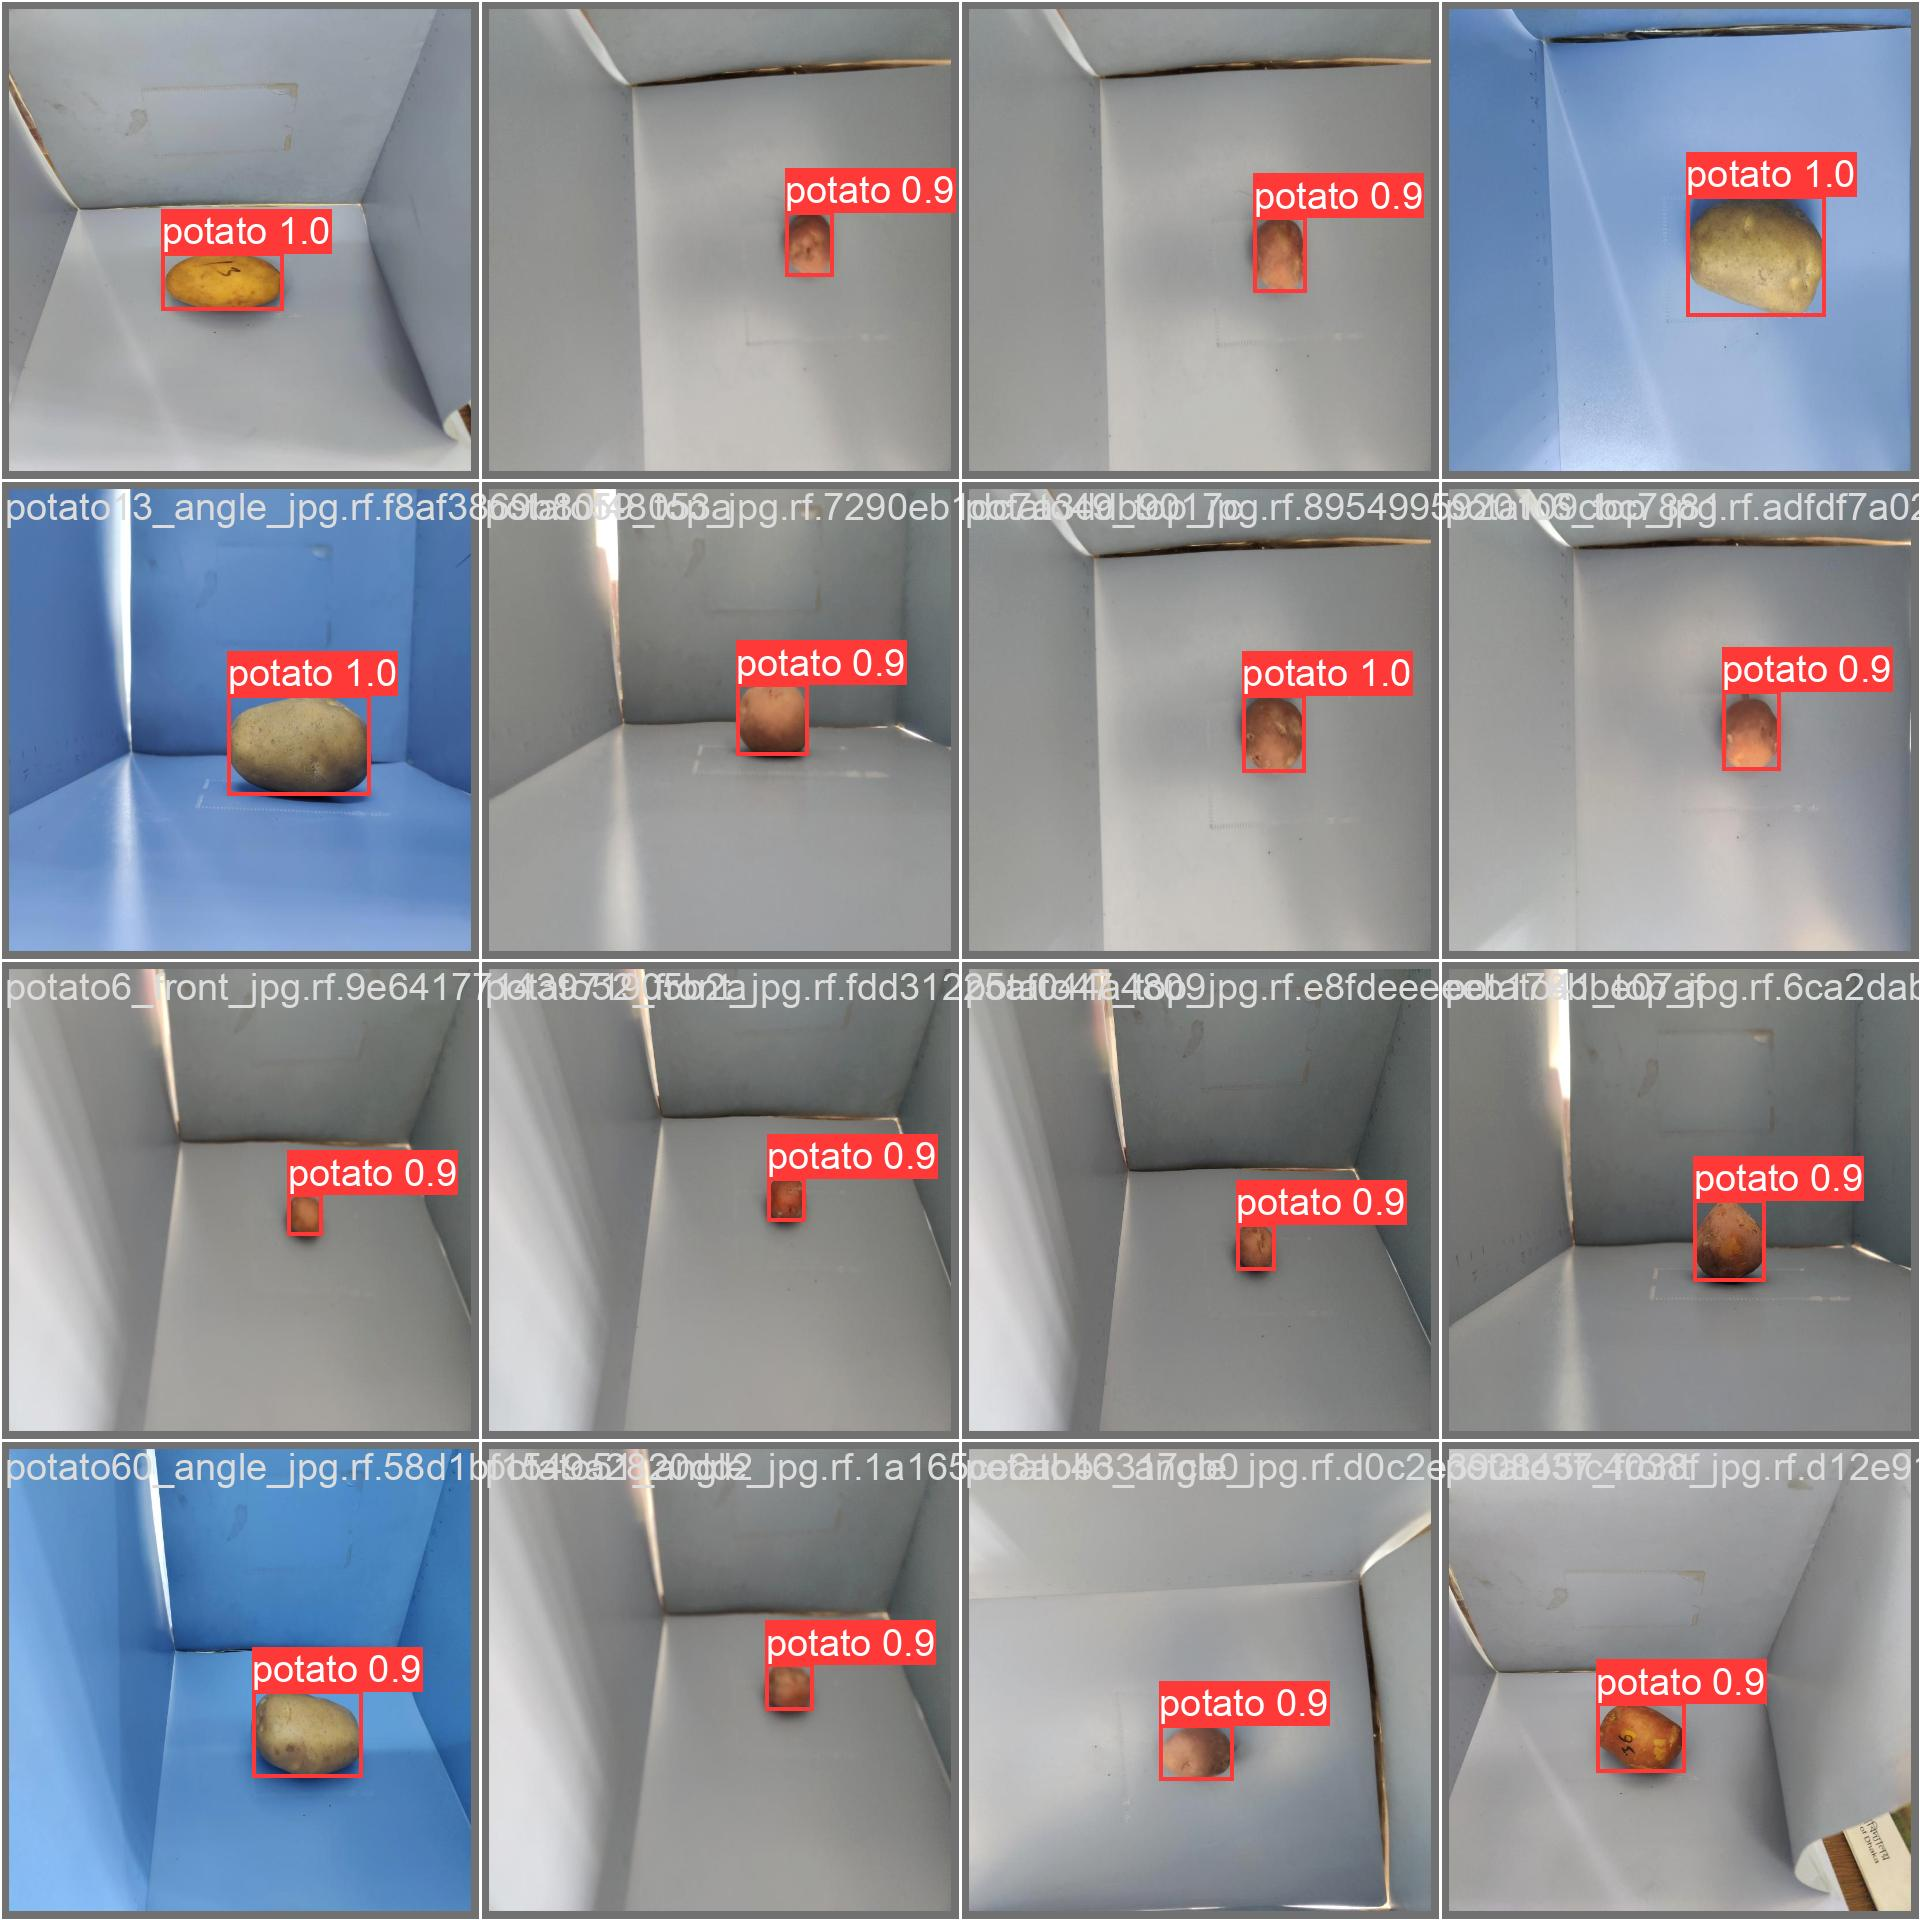

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [ ]:
HOME

'/content'

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-10 17:37:53.525052: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 17:37:54.813300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/potato-instance-segmentation-2/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.34it/s]
                   all         27         28      0.998      0.964       0.98       0.98
Speed: 0.3ms pre

                 Class     Images  Instances      Box(P          R      mAP50   mAP50-95)
                   all         27         28      0.998      0.964       0.98       0.98

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-10-10 17:02:23.038293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 17:02:23.889271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/18 /content/datasets/potato-instance-segmentation-2/test/images/potato13_front_jpg.rf.d68896ea5182618430f5ae5cc619d001.jpg: 800x800 1 potato, 24.6ms
image 2/18 /content/datasets/potato-instance-segmentation-2/test/images/potato13_top_jpg.rf.56d4d61e67504139c95062021ad1fc8f.jpg: 800x800 1 potato, 24.6ms
image 3/18 /content/datasets/potato-instance-segmentation-2/test/im

**NOTE:** Let's take a look at few results.

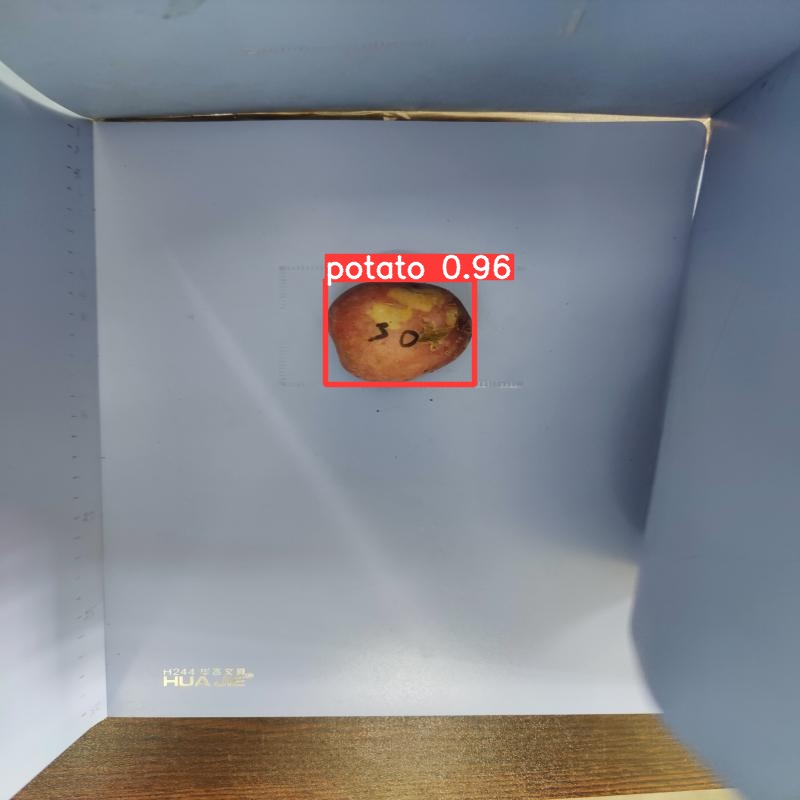

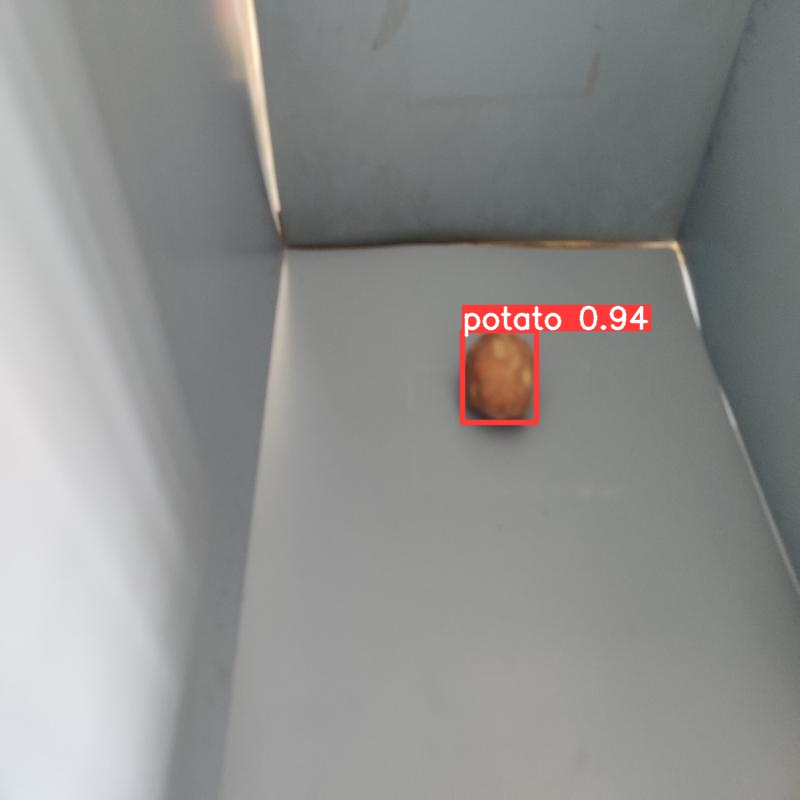

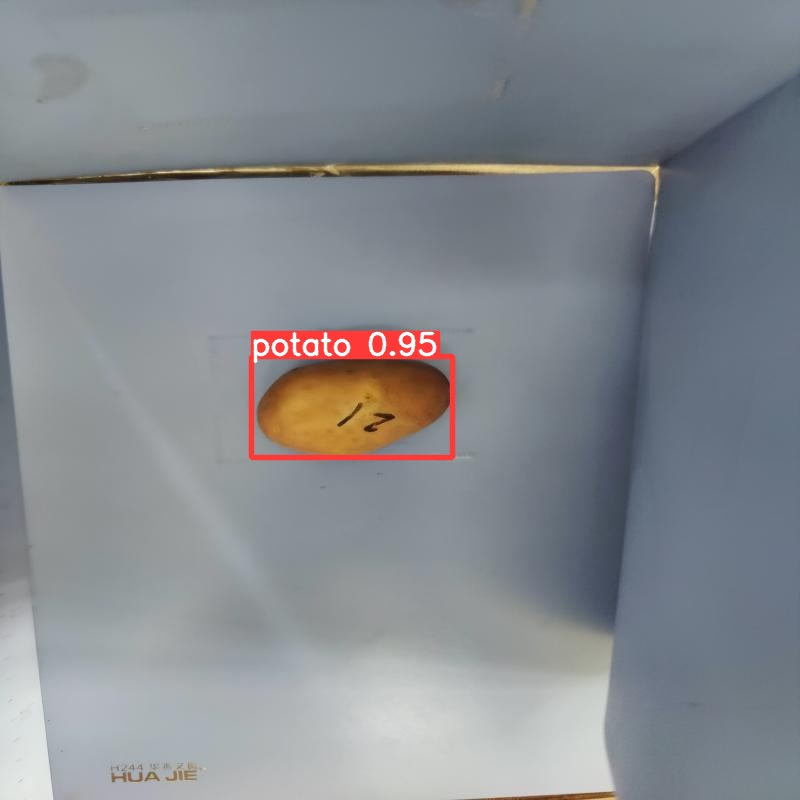

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")